In [ ]:
import random
import numpy as np
import os

def set_all_seeds(seed=42):
    """
    Закрепляет все возможные сиды для воспроизводимости.
    
    Параметры:
    seed (int): Значение сида.
    """
    random.seed(seed)
    
    np.random.seed(seed)
    
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    try:
        import tensorflow as tf
        tf.random.set_seed(seed)
        print("TensorFlow seed set.")
    except ImportError:
        print("TensorFlow not installed.")
    
    try:
        import torch
        torch.manual_seed(seed)
        if torch.cuda.is_available():
            torch.cuda.manual_seed_all(seed)
        print("PyTorch seed set.")
    except ImportError:
        print("PyTorch not installed.")

set_all_seeds(42)

2024-06-19 08:43:01.269015: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-19 08:43:01.651489: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-06-19 08:43:01.651519: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-06-19 08:43:01.670452: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-19 08:43:04.178914: W tensorflow/stream_executor/platform/de

In [ ]:
pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.4/251.4 kB 29.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 17.5 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
su26218rmfs6 = pd.read_csv('РМ - проект - котировки облигации/SU26218RMFS6_20200101_20240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26219rmfs4 = pd.read_csv('РМ - проект - котировки облигации/SU26219RMFS4_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26222rmfs8 = pd.read_csv('РМ - проект - котировки облигации/SU26222RMFS8_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26227rmfs8 = pd.read_csv('РМ - проект - котировки облигации/SU26227RMFS7_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]
su26229rmfs4 = pd.read_csv('РМ - проект - котировки облигации/SU26229RMFS3_200101_240101.csv', index_col='DATE')[['TICKER', 'CLOSE']]

imoex_me = pd.read_csv('данные пункт е fixed/IMOEX.ME (в рублях).csv', index_col='Date')[['Open']].rename(columns={'Open': 'imoex'})
rts_index = pd.read_csv('данные пункт е fixed/Прошлые данные - Индекс РТС (в долларах).csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'rts'})
brent_oil = pd.read_csv('данные пункт е fixed/нефть-brent (в долларах).csv', index_col='Дата')[['Значение']].rename(columns={'Значение': 'brent'})

# stock_quotes = pd.read_csv('котировки акций.csv', index_col='DATE')
loan_percent = pd.read_csv('кривая безкупонной доходности.csv', sep=';', index_col='date')
dollar = pd.read_csv('данные пункт е fixed/Прошлые данные - USD_RUB.csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'USD'})
euro = pd.read_csv('данные пункт е fixed/Прошлые данные - EUR_RUB.csv', index_col='Дата')[['Цена']].rename(columns={'Цена': 'EUR'})
CB = pd.read_csv('СТАВКА ЦБ.csv', sep=' ', index_col='Дата').rename(columns={'Ставка': 'CB'})
stocks = pd.read_csv('/work/котировки акций.csv', index_col='DATE')

In [ ]:
# stock_quotes.index = pd.to_datetime(stock_quotes.index, dayfirst=True)
su26218rmfs6.index = pd.to_datetime(su26218rmfs6.index, format='%Y-%m-%d')
su26219rmfs4.index = pd.to_datetime(su26219rmfs4.index, format='%Y-%m-%d')
su26222rmfs8.index = pd.to_datetime(su26222rmfs8.index, format='%Y-%m-%d')
su26227rmfs8.index = pd.to_datetime(su26227rmfs8.index, format='%Y-%m-%d')
su26229rmfs4.index = pd.to_datetime(su26229rmfs4.index, format='%Y-%m-%d')
imoex_me.index = pd.to_datetime(imoex_me.index, format='%Y-%m-%d')
rts_index.index = pd.to_datetime(rts_index.index, dayfirst=True)
loan_percent.index = pd.to_datetime(loan_percent.index, dayfirst=True)
brent_oil.index = pd.to_datetime(brent_oil.index, dayfirst=True)
CB.index = pd.to_datetime(CB.index, dayfirst=True)
dollar.index = pd.to_datetime(dollar.index, dayfirst=True)
euro.index = pd.to_datetime(euro.index, dayfirst=True)
stocks.index = pd.to_datetime(stocks.index, dayfirst=True)

/tmp/ipykernel_74/2628436320.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_oil.index = pd.to_datetime(brent_oil.index, dayfirst=True)


In [ ]:
stocks

SBER  PIKK  ROSN  BELU  MGNT  NLMK  KROT  CHMF  NVTK  PHOR
DATE                                                                  
2020-01-04   255   407   456     9   726  3445     5   144     5   309
2020-01-07   253     9   405   455     6   729  3416   141    94   308
2020-01-09   259    15   407   452   717  3427   139     5   314     5
2020-01-10   257    99   406     6   460     2   723  3348   141    96
2020-01-11   258    19   407     5   473     5   725  3319     5   143
...          ...   ...   ...   ...   ...   ...   ...   ...   ...   ...
2023-12-26   271     8   685   584    45  5385  6939     5   177     2
2023-12-27   271     9   675     2   589     3  5364  6920     5   179
2023-12-28   271     8   663     4   594    55  5333  6982     5   179
2023-12-29   271    74   668     7   591     9  5333  6970   179     4
2023-12-30   270    82   677   593     2  5347  7006   178     5  2389

[993 rows x 10 columns]

In [ ]:
su26218rmfs6.columns = su26218rmfs6.columns + "_" + su26218rmfs6['TICKER'][0]
su26219rmfs4.columns = su26219rmfs4.columns + "_" + su26219rmfs4['TICKER'][0]
su26222rmfs8.columns = su26222rmfs8.columns + "_" + su26222rmfs8['TICKER'][0]
su26227rmfs8.columns = su26227rmfs8.columns + "_" + su26227rmfs8['TICKER'][0]
su26229rmfs4.columns = su26229rmfs4.columns + "_" + su26229rmfs4['TICKER'][0]

loan_percent.columns = "loan_percent_curve_" + loan_percent.columns

/tmp/ipykernel_74/359261028.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26218rmfs6.columns = su26218rmfs6.columns + "_" + su26218rmfs6['TICKER'][0]
/tmp/ipykernel_74/359261028.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26219rmfs4.columns = su26219rmfs4.columns + "_" + su26219rmfs4['TICKER'][0]
/tmp/ipykernel_74/359261028.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  su26222rmfs8.columns = su26222rmfs8.colu

In [ ]:
tmp = su26218rmfs6.iloc[0,0]
su26218rmfs6.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26219rmfs4.iloc[0,0]
su26219rmfs4.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26222rmfs8.iloc[0,0]
su26222rmfs8.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26227rmfs8.iloc[0,0]
su26227rmfs8.drop(columns=[f'TICKER_{tmp}'], inplace=True)
tmp = su26229rmfs4.iloc[0,0]
su26229rmfs4.drop(columns=[f'TICKER_{tmp}'], inplace=True)

In [ ]:
merged_df = pd.DataFrame(index = pd.date_range(start='2020-01-01', end='2024-01-01', freq='D'))
merged_df = merged_df.join(su26218rmfs6)
merged_df = merged_df.join(su26219rmfs4)
merged_df = merged_df.join(su26222rmfs8)
merged_df = merged_df.join(su26227rmfs8)
merged_df = merged_df.join(su26229rmfs4)
merged_df = merged_df.join(imoex_me)
merged_df = merged_df.join(rts_index)
merged_df = merged_df.join(loan_percent)
merged_df = merged_df.join(brent_oil)
merged_df = merged_df.join(CB)
merged_df = merged_df.join(dollar)
merged_df = merged_df.join(euro)
merged_df = merged_df.join(stocks)

In [ ]:
merged_df.rts = merged_df.rts.str.replace(".", "")
for column in merged_df.columns:
    if merged_df[column].dtype == 'object':
        merged_df[column] = merged_df[column].str.replace(",", '.').astype(float)

In [ ]:
merged_df

CLOSE_SU26218RMFS6  CLOSE_SU26219RMFS4  CLOSE_SU26222RMFS8  \
2020-01-01                 NaN                 NaN                 NaN   
2020-01-02                 NaN                 NaN                 NaN   
2020-01-03             118.490             109.099             104.851   
2020-01-04                 NaN                 NaN                 NaN   
2020-01-05                 NaN                 NaN                 NaN   
...                        ...                 ...                 ...   
2023-12-28              84.411              91.928              96.800   
2023-12-29              84.771              91.900              96.592   
2023-12-30                 NaN                 NaN                 NaN   
2023-12-31                 NaN                 NaN                 NaN   
2024-01-01                 NaN                 NaN                 NaN   

            CLOSE_SU26227RMFS7  CLOSE_SU26229RMFS3        imoex      rts  \
2020-01-01                 NaN                 NaN  3059.199951  1564.18   
2020-01-02                 NaN                 NaN          NaN      NaN   
2020-01-03             105.769             105.350  3059.199951  1564.18   
2020-01-04                 NaN                 NaN          NaN      NaN   
2020-01-05                 NaN                 NaN          NaN      NaN   
...                        ...                 ...          ...      ...   
2023-12-28              97.424              91.000  3099.560059  1090.93   
2023-12-29              97.784              91.181  3092.659912  1083.48   
2023-12-30                 NaN                 NaN          NaN      NaN   
2023-12-31                 NaN                 NaN          NaN      NaN   
2024-01-01                 NaN                 NaN  3092.659912  1083.48   

            loan_percent_curve_0,25  loan_percent_curve_0,5  \
2020-01-01                     4.79                    4.94   
2020-01-02                      NaN                     NaN   
2020-01-03                     4.97                    5.08   
2020-01-04                      NaN                     NaN   
2020-01-05                      NaN                     NaN   
...                             ...                     ...   
2023-12-28                    12.78                   12.72   
2023-12-29                    11.73                   12.35   
2023-12-30                      NaN                     NaN   
2023-12-31                      NaN                     NaN   
2024-01-01                      NaN                     NaN   

            loan_percent_curve_0,75  ...   SBER   PIKK   ROSN   BELU   MGNT  \
2020-01-01                     5.08  ...    NaN    NaN    NaN    NaN    NaN   
2020-01-02                      NaN  ...    NaN    NaN    NaN    NaN    NaN   
2020-01-03                     5.18  ...    NaN    NaN    NaN    NaN    NaN   
2020-01-04                      NaN  ...  255.0  407.0  456.0    9.0  726.0   
2020-01-05                      NaN  ...    NaN    NaN    NaN    NaN    NaN   
...                             ...  ...    ...    ...    ...    ...    ...   
2023-12-28                    12.65  ...  271.0    8.0  663.0    4.0  594.0   
2023-12-29                    12.66  ...  271.0   74.0  668.0    7.0  591.0   
2023-12-30                      NaN  ...  270.0   82.0  677.0  593.0    2.0   
2023-12-31                      NaN  ...    NaN    NaN    NaN    NaN    NaN   
2024-01-01                      NaN  ...    NaN    NaN    NaN    NaN    NaN   

              NLMK    KROT    CHMF   NVTK    PHOR  
2020-01-01     NaN     NaN     NaN    NaN     NaN  
2020-01-02     NaN     NaN     NaN    NaN     NaN  
2020-01-03     NaN     NaN     NaN    NaN     NaN  
2020-01-04  3445.0     5.0   144.0    5.0   309.0  
2020-01-05     NaN     NaN     NaN    NaN     NaN  
...            ...     ...     ...    ...     ...  
2023-12-28    55.0  5333.0  6982.0    5.0   179.0  
2023-12-29     9.0  5333.0  6970.0  179.0     4.0  
2023-12-30  5347.0  7006.0   178.0  

In [ ]:
other = [
        'CB', 'SBER', 'PIKK', 'ROSN', 
        'BELU', 'MGNT', 'NLMK', 'KROT',
        'CHMF', 'NVTK', 'PHOR'
        ]

cols = merged_df.columns[merged_df.columns.str.startswith('CLOSE_SU')]
cols = cols.append(pd.Index(other))

easy_columns = merged_df.drop(cols, axis = 1).columns

for column in easy_columns:
    merged_df[column] = merged_df[column].ffill()

mask_before = merged_df.index <= '2020-01-04'
mask_after = merged_df.index >= '2020-01-03'

# Применяем frontfill и backfill для колонок, начинающихся с CLOSE_SU
merged_df.loc[mask_before, cols] = merged_df.loc[mask_before, cols].bfill()
merged_df.loc[mask_after, cols] = merged_df.loc[mask_after, cols].ffill()


In [ ]:
merged_df

CLOSE_SU26218RMFS6  CLOSE_SU26219RMFS4  CLOSE_SU26222RMFS8  \
2020-01-01             118.490             109.099             104.851   
2020-01-02             118.490             109.099             104.851   
2020-01-03             118.490             109.099             104.851   
2020-01-04             118.490             109.099             104.851   
2020-01-05             118.490             109.099             104.851   
...                        ...                 ...                 ...   
2023-12-28              84.411              91.928              96.800   
2023-12-29              84.771              91.900              96.592   
2023-12-30              84.771              91.900              96.592   
2023-12-31              84.771              91.900              96.592   
2024-01-01              84.771              91.900              96.592   

            CLOSE_SU26227RMFS7  CLOSE_SU26229RMFS3        imoex      rts  \
2020-01-01             105.769             105.350  3059.199951  1564.18   
2020-01-02             105.769             105.350  3059.199951  1564.18   
2020-01-03             105.769             105.350  3059.199951  1564.18   
2020-01-04             105.769             105.350  3059.199951  1564.18   
2020-01-05             105.769             105.350  3059.199951  1564.18   
...                        ...                 ...          ...      ...   
2023-12-28              97.424              91.000  3099.560059  1090.93   
2023-12-29              97.784              91.181  3092.659912  1083.48   
2023-12-30              97.784              91.181  3092.659912  1083.48   
2023-12-31              97.784              91.181  3092.659912  1083.48   
2024-01-01              97.784              91.181  3092.659912  1083.48   

            loan_percent_curve_0,25  loan_percent_curve_0,5  \
2020-01-01                     4.79                    4.94   
2020-01-02                     4.79                    4.94   
2020-01-03                     4.97                    5.08   
2020-01-04                     4.97                    5.08   
2020-01-05                     4.97                    5.08   
...                             ...                     ...   
2023-12-28                    12.78                   12.72   
2023-12-29                    11.73                   12.35   
2023-12-30                    11.73                   12.35   
2023-12-31                    11.73                   12.35   
2024-01-01                    11.73                   12.35   

            loan_percent_curve_0,75  ...   SBER   PIKK   ROSN   BELU   MGNT  \
2020-01-01                     5.08  ...  255.0  407.0  456.0    9.0  726.0   
2020-01-02                     5.08  ...  255.0  407.0  456.0    9.0  726.0   
2020-01-03                     5.18  ...  255.0  407.0  456.0    9.0  726.0   
2020-01-04                     5.18  ...  255.0  407.0  456.0    9.0  726.0   
2020-01-05                     5.18  ...  255.0  407.0  456.0    9.0  726.0   
...                             ...  ...    ...    ...    ...    ...    ...   
2023-12-28                    12.65  ...  271.0    8.0  663.0    4.0  594.0   
2023-12-29                    12.66  ...  271.0   74.0  668.0    7.0  591.0   
2023-12-30                    12.66  ...  270.0   82.0  677.0  593.0    2.0   
2023-12-31                    12.66  ...  270.0   82.0  677.0  593.0    2.0   
2024-01-01                    12.66  ...  270.0   82.0  677.0  593.0    2.0   

              NLMK    KROT    CHMF   NVTK    PHOR  
2020-01-01  3445.0     5.0   144.0    5.0   309.0  
2020-01-02  3445.0     5.0   144.0    5.0   309.0  
2020-01-03  3445.0     5.0   144.0    5.0   309.0  
2020-01-04  3445.0     5.0   144.0    5.0   309.0  
2020-01-05  3445.0     5.0   144.0    5.0   309.0  
...            ...     ...     ...    ...     ...  
2023-12-28    55.0  5333.0  6982.0    5.0   179.0  
2023-12-29     9.0  5333.0  6970.0  179.0     4.0  
2023-12-30  5347.0  7006.0   178.0  

In [ ]:
merged_df.columns

Index(['CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8',
       'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'imoex', 'rts',
       'loan_percent_curve_0,25', 'loan_percent_curve_0,5',
       'loan_percent_curve_0,75', 'loan_percent_curve_1',
       'loan_percent_curve_2', 'loan_percent_curve_3', 'loan_percent_curve_5',
       'loan_percent_curve_7', 'loan_percent_curve_10',
       'loan_percent_curve_15', 'loan_percent_curve_20',
       'loan_percent_curve_30', 'brent', 'CB', 'USD', 'EUR', 'SBER', 'PIKK',
       'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR'],
      dtype='object')

# Генерим фичи - риск факторы

In [ ]:
VVP = pd.read_excel("VVP_kvartal_s 1995-2024.xlsx", sheet_name=2)
dates = [f"01-{(quartal*3 + 1):02d}-{2020+year}" for year in range(3) for quartal in range(4)]
VVP = pd.Series(data=VVP.iloc[3, 36:].T.values, index=pd.date_range('01-01-2020', '01-01-2024', 16))
VVP.index = pd.to_datetime(VVP.index)

merged_df['GDP'] = VVP
merged_df['GDP'] = merged_df['GDP'].ffill()

In [ ]:
# credits_overdue = pd.read_excel("302-09.xlsx", skiprows=6, index_col=0).iloc[:, 0]
# merged_df['credits_overdue'] = credits_overdue
# merged_df
# # merged_df['credits_overdue'] = merged_df['credits_overdue'].

In [ ]:
df = pd.read_excel("obs_tabl20c_do_20240101.xlsx")

df = df.drop(index=[1, 59, 60, 61, 62, 63, 64])

# Transpose the dataframe
df_transposed = df.transpose()
df_transposed = df_transposed[1:]


# Set the first row as the header
df_transposed.columns = df_transposed.iloc[0]
df_transposed = df_transposed.drop(df_transposed.index[0])

# Set the index to the dates
df_transposed.index = df_transposed['Активы - в рублях и иностранной валюте']
df_transposed.index.name = 'Дата'
# df_transposed = df_transposed.iloc[:, 1:]
columns = [
    'Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)',
    'Депозиты в Банке России',
    'Обязательные резервы в Банке России ',
    'Кредиты банкам',
    'Ценные бумаги',
    'Участие в уставных капиталах',
    'Кредитный портфель и прочие размещенные средства',
    'Основные средства и финансовая аренда',
    'Прочие активы'
]
df_transposed = df_transposed[columns]


merged_df  = merged_df.join(df_transposed)
merged_df[columns] = merged_df[columns].ffill()
merged_df

CLOSE_SU26218RMFS6  CLOSE_SU26219RMFS4  CLOSE_SU26222RMFS8  \
2020-01-01             118.490             109.099             104.851   
2020-01-02             118.490             109.099             104.851   
2020-01-03             118.490             109.099             104.851   
2020-01-04             118.490             109.099             104.851   
2020-01-05             118.490             109.099             104.851   
...                        ...                 ...                 ...   
2023-12-28              84.411              91.928              96.800   
2023-12-29              84.771              91.900              96.592   
2023-12-30              84.771              91.900              96.592   
2023-12-31              84.771              91.900              96.592   
2024-01-01              84.771              91.900              96.592   

            CLOSE_SU26227RMFS7  CLOSE_SU26229RMFS3        imoex      rts  \
2020-01-01             105.769             105.350  3059.199951  1564.18   
2020-01-02             105.769             105.350  3059.199951  1564.18   
2020-01-03             105.769             105.350  3059.199951  1564.18   
2020-01-04             105.769             105.350  3059.199951  1564.18   
2020-01-05             105.769             105.350  3059.199951  1564.18   
...                        ...                 ...          ...      ...   
2023-12-28              97.424              91.000  3099.560059  1090.93   
2023-12-29              97.784              91.181  3092.659912  1083.48   
2023-12-30              97.784              91.181  3092.659912  1083.48   
2023-12-31              97.784              91.181  3092.659912  1083.48   
2024-01-01              97.784              91.181  3092.659912  1083.48   

            loan_percent_curve_0,25  loan_percent_curve_0,5  \
2020-01-01                     4.79                    4.94   
2020-01-02                     4.79                    4.94   
2020-01-03                     4.97                    5.08   
2020-01-04                     4.97                    5.08   
2020-01-05                     4.97                    5.08   
...                             ...                     ...   
2023-12-28                    12.78                   12.72   
2023-12-29                    11.73                   12.35   
2023-12-30                    11.73                   12.35   
2023-12-31                    11.73                   12.35   
2024-01-01                    11.73                   12.35   

            loan_percent_curve_0,75  ...           GDP  \
2020-01-01                     5.08  ...  24865.958067   
2020-01-02                     5.08  ...  24865.958067   
2020-01-03                     5.18  ...  24865.958067   
2020-01-04                     5.18  ...  24865.958067   
2020-01-05                     5.18  ...  24865.958067   
...                             ...  ...           ...   
2023-12-28                    12.65  ...  38761.701765   
2023-12-29                    12.66  ...  38761.701765   
2023-12-30                    12.66  ...  38761.701765   
2023-12-31                    12.66  ...  38761.701765   
2024-01-01                    12.66  ...  50814.443887   

            Денежные средства (касса, чеки, денежные средства в пути, в банкоматах)  \
2020-01-01                                        1593.697288                         
2020-01-02                                        1593.697288                         
2020-01-03                                        1593.697288                         
2020-01-04                                        1593.697288                         
2020-01-05                                        1593.697288                         
...                                                       ...                         
2023-12-28                                        1890.354953                         
2023-12-29                                        1890.35495

In [ ]:
merged_df['SVO'] = merged_df.index >= '2022-02-24'
merged_df['SBER_sanctions'] = merged_df.index >= '2022-04-06'
merged_df['ROSN_sanctions'] = merged_df.index >= '2022-03-15'
merged_df['BELUGA_sold_intern_rights'] = merged_df.index >= '2022-10-19'
merged_df['SEVERSTAL_stopped_EU'] = merged_df.index >= '2022-03-02'
merged_df['FOSAGRO_sanctions'] = merged_df.index >= '2022-11-15'


In [ ]:
RU_inflation = pd.read_csv("/work/russia.inflation.monthly (statbureau.org).csv")
RU_inflation = RU_inflation.drop(" Всего", axis=1)

RU_inflation_schlong = pd.melt(RU_inflation, id_vars=["Год"])
months = RU_inflation.columns[1:]

mapping = {v: k + 1 for k, v in dict(enumerate(months)).items()}

RU_inflation_schlong["Месяц"] = RU_inflation_schlong["variable"].map(mapping)
RU_inflation_schlong = RU_inflation_schlong.drop(["variable"], axis=1)
RU_inflation_schlong["Месяц"] = RU_inflation_schlong["Месяц"].apply(lambda elem: f"{elem:02}")

RU_inflation_schlong.index = pd.to_datetime(RU_inflation_schlong["Год"].astype(str) + "-" + RU_inflation_schlong["Месяц"].astype(str) + "-01")
merged_df["RU_inflation"] = RU_inflation_schlong["value"]
merged_df["RU_inflation"] = merged_df["RU_inflation"].ffill()

In [ ]:
def generate_lagged_features(df, columns, lags):
    """
    Generate lagged features for specified columns and lags.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    columns (list): List of column names to generate lagged features for.
    lags (list): List of integer lag values.

    Returns:
    pd.DataFrame: Dataframe with lagged features added.
    """
    lagged_df = df.copy()
    for column in columns:
        if column in df.columns:
            for lag in lags:
                lagged_df[f'{column}_lag{lag}'] = df[column].shift(lag)
        else:
            print(f"Warning: Column '{column}' not found in DataFrame.")
    return lagged_df

columns_to_lag = [
    "CLOSE_SU26218RMFS6",
    "CLOSE_SU26219RMFS4",
    "CLOSE_SU26222RMFS8",
    "CLOSE_SU26227RMFS7",
    "CLOSE_SU26229RMFS3"
    ]
lags = [1, 2, 3, 4, 5, 10, 15, 25]

lagged_df = generate_lagged_features(merged_df, columns_to_lag, lags)

In [ ]:
lagged_df

CLOSE_SU26218RMFS6  CLOSE_SU26219RMFS4  CLOSE_SU26222RMFS8  \
2020-01-01             118.490             109.099             104.851   
2020-01-02             118.490             109.099             104.851   
2020-01-03             118.490             109.099             104.851   
2020-01-04             118.490             109.099             104.851   
2020-01-05             118.490             109.099             104.851   
...                        ...                 ...                 ...   
2023-12-28              84.411              91.928              96.800   
2023-12-29              84.771              91.900              96.592   
2023-12-30              84.771              91.900              96.592   
2023-12-31              84.771              91.900              96.592   
2024-01-01              84.771              91.900              96.592   

            CLOSE_SU26227RMFS7  CLOSE_SU26229RMFS3        imoex      rts  \
2020-01-01             105.769             105.350  3059.199951  1564.18   
2020-01-02             105.769             105.350  3059.199951  1564.18   
2020-01-03             105.769             105.350  3059.199951  1564.18   
2020-01-04             105.769             105.350  3059.199951  1564.18   
2020-01-05             105.769             105.350  3059.199951  1564.18   
...                        ...                 ...          ...      ...   
2023-12-28              97.424              91.000  3099.560059  1090.93   
2023-12-29              97.784              91.181  3092.659912  1083.48   
2023-12-30              97.784              91.181  3092.659912  1083.48   
2023-12-31              97.784              91.181  3092.659912  1083.48   
2024-01-01              97.784              91.181  3092.659912  1083.48   

            loan_percent_curve_0,25  loan_percent_curve_0,5  \
2020-01-01                     4.79                    4.94   
2020-01-02                     4.79                    4.94   
2020-01-03                     4.97                    5.08   
2020-01-04                     4.97                    5.08   
2020-01-05                     4.97                    5.08   
...                             ...                     ...   
2023-12-28                    12.78                   12.72   
2023-12-29                    11.73                   12.35   
2023-12-30                    11.73                   12.35   
2023-12-31                    11.73                   12.35   
2024-01-01                    11.73                   12.35   

            loan_percent_curve_0,75  ...  CLOSE_SU26227RMFS7_lag15  \
2020-01-01                     5.08  ...                       NaN   
2020-01-02                     5.08  ...                       NaN   
2020-01-03                     5.18  ...                       NaN   
2020-01-04                     5.18  ...                       NaN   
2020-01-05                     5.18  ...                       NaN   
...                             ...  ...                       ...   
2023-12-28                    12.65  ...                    97.015   
2023-12-29                    12.66  ...                    96.900   
2023-12-30                    12.66  ...                    97.000   
2023-12-31                    12.66  ...                    97.000   
2024-01-01                    12.66  ...                    97.000   

            CLOSE_SU26227RMFS7_lag25  CLOSE_SU26229RMFS3_lag1  \
2020-01-01                       NaN                      NaN   
2020-01-02                       NaN                  105.350   
2020-01-03                       NaN                  105.350   
2020-01-04                       NaN                  105.350   
2020-01-05                       NaN                  105.350   
...                              ...                      ...   
2023-12-28                    97.081                   90.971   
2023-12-29                    96.957                   91.000   
2023-12-30                 

In [ ]:
merged_df['imoex_ema7'] = merged_df['imoex'].ewm(span=7, adjust=False).mean()

In [ ]:
columns_to_models = [
    'CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8',
    'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'SBER', 'PIKK',
    'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR', 'USD', 'EUR'
]

columns_to_models = dict.fromkeys(columns_to_models, None)
print(columns_to_models.keys())

exog = merged_df.drop(columns = list(columns_to_models.keys()))[1:]
endogs = merged_df[list(columns_to_models.keys())].shift().dropna()



dict_keys(['CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8', 'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3', 'SBER', 'PIKK', 'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR', 'USD', 'EUR'])


In [ ]:
num_features = 10

In [ ]:
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 100.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 50.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# columns_to_subexog - экзогенные по колонке
# columns_to_models - сюда класть модели относительно фичей
# columns_to_params - настроим после
# {target_column: ((p,d,q,P,Q,D,m))}
# p_values, d_values, q_values, P_values, D_values, Q_values, m_values = columns_to_params[column]

columns_to_params = {}


import itertools
import math
import warnings
from sklearn.metrics import r2_score, mean_absolute_error
from tqdm import tqdm
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA



# Теперь сделаем анализ рядов фич

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline 
def tsplot(y, name, lags=None, figsize=(15, 15), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title(f'Time Series Analysis Plots: {name}')
        
        sm.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        sm.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()



In [ ]:
def analyze_time_series(ts, name):
    """
    Выводит параметры распределения временного ряда и строит график его распределения.

    Parameters:
    ts (pd.Series): Временной ряд.

    Returns:
    dict: Словарь с параметрами распределения.
    """
    distribution_params = {
        'mean': ts.mean(),
        'std_dev': ts.std(),
        'median': ts.median(),
        'q1': ts.quantile(0.25),
        'q3': ts.quantile(0.75),
        'min': ts.min(),
        'max': ts.max(),
    }

    # Построение графика распределения
    plt.figure(figsize=(10, 6))
    plt.hist(ts, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.title(f'Distribution of {name} Time Series')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return distribution_params

In [ ]:
#for risk_column, risk_name in [(exog[column], column) for column in exog.columns]:
    # Additive Decomposition
#    risk_column.index = pd.to_datetime(risk_column.index)
#    print(f"{risk_name}: {analyze_time_series(risk_column, risk_name)}")

<img src="image-20240611-212448.png" width="" align="" />

In [ ]:
#  for target_column, target_name in [(merged_df[column], column) for column in columns_to_models.keys()]:
#     tsplot(target_column, target_name, lags = 60)

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# %matplotlib inline 

# for target_column, target_name in [(merged_df[column], column) for column in columns_to_models.keys()]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()
 

In [ ]:
# differenced_df = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in columns_to_models.keys():
#     differenced_series = merged_df[column].diff().dropna()
#     differenced_df[column] = differenced_series


<img src="image-20240611-212448.png" width="" align="" />

In [ ]:
# differenced_df = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in columns_to_models.keys():
#     differenced_series = merged_df[column].diff().dropna()
#     differenced_df[column] = differenced_series
 
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_models.keys()]:
#     tsplot(target_column, target_name, lags = 30)

In [ ]:
# columns_to_subexog = {}

# from sklearn.feature_selection import mutual_info_regression

# for target in columns_to_models.keys():
#     # Calculate mutual information and get top num_features
#     sorted_cols = exog.columns[np.argsort(mutual_info_regression(exog.loc[differenced_df.index], differenced_df[target]))]
#     best_cols = sorted_cols[-num_features:]
#     columns_to_subexog[target] = exog.loc[differenced_df.index, best_cols]

# for target_name, exog in columns_to_subexog.items():
#     assert len(differenced_df) == len(exog), f"{len(differenced_df)} != {len(exog)}"

In [ ]:
# %matplotlib inline 
# from statsmodels.tsa.seasonal import seasonal_decompose


# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_models.keys()]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()

In [ ]:
# differenced_df_spec = pd.DataFrame()

# # Цикл для дифференцирования временных рядов
# for column in ['USD', 'EUR']:
#     differenced_series = merged_df[column].diff(7).dropna()
#     differenced_df_spec[column + '_7'] = differenced_series
#     differenced_series = merged_df[column].diff(24).dropna()
#     differenced_df_spec[column + '_24'] = differenced_series
 
# for target_column, target_name in [(differenced_df_spec[column], column) for column in ['USD_7', 'EUR_7','USD_24', 'EUR_24']]:
#     tsplot(target_column, target_name, lags = 30)

In [ ]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# for target_column, target_name in [(differenced_df_spec[column], column) for column in ['USD_7', 'EUR_7']]:
#     # Additive Decomposition
#     result_add = seasonal_decompose(target_column, model='additive', extrapolate_trend='freq')

#     # Plot
#     plt.rcParams.update({'figure.figsize': (10,10)})
#     fig = result_add.plot()

In [ ]:
columns_to_params['CLOSE_SU26218RMFS6'] = [0], [0], range(3), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26219RMFS4'] = [0], [0], range(3), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26222RMFS8'] = [0], range(2), range(4), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26227RMFS7'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['CLOSE_SU26229RMFS3'] = [0], [0], range(4), [0], [0], [0], [0]

columns_to_params['SBER'] = [0], [0], range(2), [0], [0], [0], [0]
columns_to_params['PIKK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['ROSN'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['BELU'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['MGNT'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['KROT'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['CHMF'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['NVTK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['PHOR'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['NLMK'] = [0], [0], range(4), [0], [0], [0], [0]
columns_to_params['USD'] = range(3), range(2), range(3), range(3), range(2), range(3), [10]
columns_to_params['EUR'] = [0], [0], range(3), range(0,8), range(2), range(2), [0]

# Подбираем SARIMAX под каждый таргет!

In [ ]:
!pip install joblib==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 31.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.2.0
    Not uninstalling joblib at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'joblib'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Not uninstalling scikit-learn at /shared-libs/python3.9/py/lib/python3.9/site-packages, outside environment /root/venv
    Can't uninstall 'scikit-learn'. No files were found to uninstall.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
!pip install statsmodels==0.14.2


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# import warnings
# import statsmodels.api as sm
# import itertools
# from tqdm import tqdm
# import math
# import pandas as pd
# from sklearn.metrics import mean_absolute_error, r2_score
# import numpy as np

# # Disable warnings for clearer output
# warnings.filterwarnings("ignore")

# # Initialize the dictionary to store SARIMAX models
# sarimax_models = {}

# start_date = '2020-02-01'
# threshold_date = '2021-07-01'
# end_date = '2021-10-01'

# # Function to ensure the data is in the correct format
# def ensure_numeric(df):
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

# # Define your optimize function
# def optimize(p_values, d_values, q_values, 
#              P_values, D_values, Q_values, m_values, 
#              target, exog, 
#              start_date, threshold_date, end_date,
#              target_name=None, verbose=True):
#     # Ensure data is numeric
#     target = ensure_numeric(target)
#     if exog is not None:
#         exog = ensure_numeric(exog)
    
#     # Check index is DatetimeIndex
#     if not isinstance(target.index, pd.DatetimeIndex):
#         target.index = pd.to_datetime(target.index)
#     if exog is not None and not isinstance(exog.index, pd.DatetimeIndex):
#         exog.index = pd.to_datetime(exog.index)

#     target = target.astype(float)
#     for column in exog.columns: exog[column] = exog[column].astype(float)

#     # Create all possible combinations of SARIMA parameters
#     param_combinations = list(itertools.product(p_values, d_values, q_values, P_values, D_values, Q_values, m_values))
#     results_exog = []

#     mask_before = (target.index < threshold_date) & (target.index >= start_date)
#     mask_after = (target.index >= threshold_date) & (target.index <= end_date)

#     # Initialize AIC with a large value
#     best_aic_SARIMA = float("inf")
#     best_params_SARIMA = None
#     best_SARIMA = None

#     warnings.filterwarnings('ignore')

#     # Perform grid search
#     for params in tqdm(param_combinations):
#         params = np.array(params).astype(float)
#         order = params[:3]
#         seasonal_order = params[3:]

#         try:
#             model_chosen = sm.tsa.statespace.SARIMAX(endog=target[mask_before], exog=exog[mask_before] if exog is not None else None, order=order, seasonal_order=seasonal_order)
#             model_chosen = model_chosen.fit(disp=False)
#             aic = model_chosen.aic

#             # Ensure the convergence of the model
#             if not math.isinf(model_chosen.zvalues.mean()):
#                 predict = model_chosen.predict(start=threshold_date, end=end_date, exog=exog[mask_after] if exog is not None else None)
#                 err_max = (target[mask_after] - predict).abs().max()
#                 mae = mean_absolute_error(target[mask_after], predict)
#                 llf = model_chosen.llf
#                 r2 = r2_score(target[mask_after], predict)
#                 aic = model_chosen.aic

#                 if aic < best_aic_SARIMA:
#                     best_aic_SARIMA = aic
#                     best_params_SARIMA = list(params)
#                     best_SARIMA = model_chosen
#                     best_err_max = err_max
#                     best_mae = mae
#                     best_llf = llf
#                     best_r2 = r2
#                     best_combination = params

#                 results_exog.append(list(params[:-1]) + [err_max, mae, llf, r2, aic])
#             else:
#                 print(order, seasonal_order, 'not converged')
#         except ValueError as e:
#             print(f'ValueError for parameters {params}: {e}')
#             continue
#         except Exception as e:
#             print(f'Exception for parameters {params}: {e}')
#             continue
#     if None not in (target_name, best_params_SARIMA):
#         # Print the best parameters and AIC
#         print(f"\n[{target_name}] Best Parameters:", best_params_SARIMA)
#         print(f"[{target_name}] Best AIC:", best_aic_SARIMA)

#         result_table = pd.DataFrame(results_exog)
#         result_table.columns = ['p', 'd', 'q', 'P', 'D', 'Q', 'err_max', 'MAE', 'LLF', 'R2', 'aic']
#         print(f"[{target_name}] by LLF:")
#         display(result_table.sort_values(by=['LLF'], ascending=False).head(1))

#         if verbose:
#             print(f"[{target_name}] by err_max:")
#             display(result_table.sort_values(by=['err_max'], ascending=True).head(1))
#             print(f"[{target_name}] by MAE:")
#             display(result_table.sort_values(by=['MAE'], ascending=True).head(1))
#             print(f"[{target_name}] by aic:")
#             display(result_table.sort_values(by=['aic'], ascending=True).head(1))
#             print(f"[{target_name}] by R2:")
#             display(result_table.sort_values(by=['R2'], ascending=False).head(1))

#     if best_SARIMA is not None:
#         return {"order": best_params_SARIMA[:3], "seasonal_order": best_params_SARIMA[3:], "model": best_SARIMA}
#     else:
#         return None

# # Loop through each column to build and store the SARIMAX model
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_params.keys()]:
#     p_values, d_values, q_values, \
#     P_values, D_values, Q_values, m_values = columns_to_params[target_name]

#     result = optimize(p_values, d_values, q_values, 
#                       P_values, D_values, Q_values, m_values, 
#                       target_column, columns_to_subexog[target_name],
#                       start_date, threshold_date, end_date,
#                       target_name, verbose=False)
    
#     if result is None:
#         print(f"optimize returned None for {target_name} with parameters: {columns_to_params[target_name]}")
#     else:
#         print(result)
#         sarimax_models[target_name] = result

# # Display the SARIMAX models dictionary keys to confirm
# sarimax_models


In [ ]:
!pip install pmdarima==2.0.4

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 85.4 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
# import warnings
# import pandas as pd
# import numpy as np
# import pmdarima as pm
# from tqdm import tqdm
# from scipy import stats

# # Disable warnings for clearer output
# warnings.filterwarnings("ignore")

# # Initialize the dictionary to store ARIMA models
# arima_models = {}

# start_date = '2020-02-01'
# threshold_date = '2021-07-01'
# end_date = '2021-10-01'

# # Function to ensure the data is in the correct format
# def ensure_numeric(df):
#     df = df.apply(pd.to_numeric, errors='coerce')
#     df = df.dropna()
#     return df

# # Function to train the model using auto_arima
# def auto_arima_model(target, exog, start_date, threshold_date, end_date, target_name=None):
#     # Ensure data is numeric
#     target = ensure_numeric(target)
#     if exog is not None:
#         exog = ensure_numeric(exog)
    
#     # Check index is DatetimeIndex
#     if not isinstance(target.index, pd.DatetimeIndex):
#         target.index = pd.to_datetime(target.index)
#     if exog is not None and not isinstance(exog.index, pd.DatetimeIndex):
#         exog.index = pd.to_datetime(exog.index)

#     target = target.astype(float)
#     if exog is not None:
#         for column in exog.columns:
#             exog[column] = exog[column].astype(float)

#     mask_before = (target.index < threshold_date) & (target.index >= start_date)
#     mask_after = (target.index >= threshold_date) & (target.index <= end_date)
#     p, d, q, P, D, Q, m = columns_to_params[target_name]
#     m = m[-1]
#     try:
#         model = pm.auto_arima(target[mask_before], exogenous=exog[mask_before] if exog is not None else None,
                              
#                               seasonal=m>0, trace=False,
#                               error_action='ignore', suppress_warnings=True, stepwise=True)

#         # Forecast
#         n_periods = len(target[mask_after])
#         forecast, conf_int = model.predict(n_periods=n_periods, exogenous=exog[mask_after] if exog is not None else None, return_conf_int=True)
        
#         err_max = (target[mask_after] - forecast).abs().max()
#         mae = mean_absolute_error(target[mask_after], forecast)
#         r2 = r2_score(target[mask_after], forecast)
#         aic = model.aic()
        
#         print(f"[{target_name}] Best Parameters: {model.order} x {model.seasonal_order}")
#         print(f"[{target_name}] AIC: {aic}, MAE: {mae}, Max Error: {err_max}, R2: {r2}")

#         return {"order": model.order, "seasonal_order": model.seasonal_order, "model": model}
    
#     except Exception as e:
#         print(f'Exception for {target_name}: {e}')
#         return None

# # Loop through each column to build and store the ARIMA model
# for target_column, target_name in [(differenced_df[column], column) for column in columns_to_params.keys()]:
#     result = auto_arima_model(target_column, columns_to_subexog[target_name],
#                               start_date, threshold_date, end_date, target_name)
    
#     if result is None:
#         print(f"auto_arima_model returned None for {target_name}")
#     else:
#         print(f"auto arima finished for {target_name}")
#         arima_models[target_name] = result

# # Display the ARIMA models dictionary keys to confirm
# arima_models


# Бустинги

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 11.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
%matplotlib inline  

def create_shifted_columns(df, columns, shifts):
    """
    Создает дополнительные колонки со сдвигами для указанных колонок DataFrame.
    
    Параметры:
    df (pd.DataFrame): Входной DataFrame.
    columns (list): Список названий колонок, для которых нужно сделать сдвиги.
    shifts (list): Массив целочисленных значений для сдвигов.
    
    Возвращает:
    pd.DataFrame: DataFrame с добавленными сдвигами.
    """
    df_copy = df.copy()
    
    for col in columns:
        for shift in shifts:
            new_col_name = f'{col}_shift_{shift}'
            df_copy[new_col_name] = df_copy[col].shift(shift)
    
    return df_copy

# Function to train the model using boostings
def boosting(X, y, start_date, threshold_date, end_date, target_name=None, graph=True):
    mask_before = (y.index < threshold_date) & (y.index >= start_date)
    mask_after = (y.index >= threshold_date) & (y.index <= end_date)

    X_train, y_train, X_test, y_test = X[mask_before], y[mask_before], X[mask_after], y[mask_after]
    try:
        parameters = {
            'verbose': [False],
            'depth' : [2, 3, 6,10],
            'learning_rate' : [0.01, 0.05, 0.1, 0.5],
            'iterations'    : [100, 500, 1000, 5000]
        }
        grid = GridSearchCV(
            scoring = 'neg_mean_squared_error',
            estimator=CatBoostRegressor(), 
            param_grid = parameters, 
            cv = 2, n_jobs=-1)
        model = grid.fit(X_train, y_train).best_estimator_
        pred = model.predict(X_test)
        if graph: 
            plt.plot(y_test.index, y_test, label = f"real {target_name}") 
            plt.plot(y_test.index, pred, label = f"pred {target_name}") 
            plt.legend() 
            plt.show()
        res = {"R2":r2_score(y_test, pred), "MSE": mean_squared_error(y_test, pred), "model":model}      
        return res
    
    except Exception as e:
        print(f'Exception for {target_name}: {e}')
        return None

In [ ]:
from catboost import CatBoostRegressor
%matplotlib inline  


# Disable warnings for clearer output
warnings.filterwarnings("ignore")

# Initialize the dictionary to store ARIMA models
boosting_models = {}

start_date = '2020-02-01'
threshold_date = '2022-07-01'
end_date = '2022-10-01'

df = create_shifted_columns(merged_df, columns_to_params.keys(), [1, 2, 3, 4, 5, 6, 7, 14, 21, 28, 30, 31])
df = df.dropna()#diff().dropna()
shifted_cols = [col for col in df.columns if '_shift_' in col]

columns_to_subexog = {}

from sklearn.feature_selection import mutual_info_regression

for target in columns_to_models.keys():
    # Calculate mutual information and get top num_features
    sorted_cols = exog.columns[np.argsort(mutual_info_regression(exog.loc[df.index], df[target]))]
    best_cols = sorted_cols[-num_features:]
    columns_to_subexog[target] = exog.loc[df.index, best_cols]

for target_name, exog in columns_to_subexog.items():
    assert len(df) == len(exog), f"{len(differenced_df)} != {len(exog)}"

# # Loop through each column to build and store the ARIMA model
# for target_name in columns_to_params.keys():

#     required_clmns = shifted_cols = [col for col in df.columns if '_shift_' in col and target_name in col]

#     X = df[required_clmns].join(columns_to_subexog[target_name])

#     result = boosting(X, df[target_name],
#                               start_date, threshold_date, end_date, target_name)
    
#     if result is None:
#         print(f"boosting died for {target_name}")
#     else:
#         print(f"boosting finished for {target_name}")
#         print(result)
#         boosting_models[target_name] = result

# # Display the ARIMA models dictionary keys to confirm
# boosting_models


In [ ]:
# import random
# import numpy as np
# import os
# import pandas as pd
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import r2_score, mean_squared_error
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
# import matplotlib.pyplot as plt
# import warnings

# # # Функция для оценки модели и возврата метрик с использованием кросс-валидации
# # def boosting(X, y, start_date, threshold_date, end_date, target_name=None):
# #     mask_before = (y.index < threshold_date) & (y.index >= start_date)
# #     mask_after = (y.index >= threshold_date) & (y.index <= end_date)

# #     X_train, y_train, X_test, y_test = X[mask_before], y[mask_before], X[mask_after], y[mask_after]

# #     try:
# #         # Определяем гиперпараметры для Grid Search
# #         param_grid = {
# #             'n_estimators': [100, 200, 300],
# #             'max_depth': [10, 20, 30, None],
# #             'min_samples_split': [2, 5, 10],
# #             'min_samples_leaf': [1, 2, 4],
# #             'bootstrap': [True, False]
# #         }
        
# #         # Инициализируем модель
# #         rf = RandomForestRegressor(random_state=42)
        
# #         # Инициализируем Grid Search
# #         grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
        
# #         # Обучаем модель
# #         grid_search.fit(X_train, y_train)
        
# #         # Лучшая модель по результатам Grid Search
# #         best_model = grid_search.best_estimator_
# #         best_params = grid_search.best_params_
        
# #         # Используем временную кросс-валидацию
# #         tscv = TimeSeriesSplit(n_splits=5)
# #         r2_scores = []
# #         mse_scores = []
# #         y_pred_all = np.array([])
# #         y_test_all = np.array([])
        
# #         for train_index, test_index in tscv.split(X_train):
# #             X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
# #             y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
# #             best_model.fit(X_train_cv, y_train_cv)
# #             y_pred_cv = best_model.predict(X_test_cv)
# #             r2_scores.append(r2_score(y_test_cv, y_pred_cv))
# #             mse_scores.append(mean_squared_error(y_test_cv, y_pred_cv))
# #             y_pred_all = np.append(y_pred_all, y_pred_cv)
# #             y_test_all = np.append(y_test_all, y_test_cv)
        
# #         # Предсказания на тестовом наборе
# #         y_pred = best_model.predict(X_test)
        
# #         # Вычисление метрик на тестовом наборе
# #         R2 = r2_score(y_test, y_pred)
# #         MSE = mean_squared_error(y_test, y_pred)
        
# #         # Средние метрики по кросс-валидации
# #         R2_cv = np.mean(r2_scores)
# #         MSE_cv = np.mean(mse_scores)
        
# #         # Формирование результата
# #         res = {"R2": R2, "MSE": MSE, "R2_cv": R2_cv, "MSE_cv": MSE_cv, "model": best_model, "best_params": best_params}
        
# #         # Построение графика
# #         plt.figure(figsize=(10, 6))
# #         plt.plot(y_test.index, y_test, label='Actual')
# #         plt.plot(y_test.index, y_pred, label='Predicted')
# #         plt.title(f'Actual vs Predicted for {target_name}')
# #         plt.xlabel('Date')
# #         plt.ylabel('Value')
# #         plt.legend()
# #         plt.grid(True)
# #         plt.show()
        
# #         return res
    
# #     except Exception as e:
# #         print(f'Exception for {target_name}: {e}')
# #         return None

# # Отключение предупреждений для более чистого вывода
# warnings.filterwarnings("ignore")

# # Инициализация словаря для хранения моделей
# boosting_models = {}

# # Параметры временных промежутков
# start_date = '2020-02-01'
# threshold_date = '2022-07-01'
# end_date = '2022-10-01'

# # Инициализация словаря для хранения подмножеств признаков
# columns_to_subexog = {}

# # Выбор лучших признаков на основе взаимной информации
# for target in columns_to_models.keys():
#     sorted_cols = exog.columns[np.argsort(mutual_info_regression(exog.loc[df.index], df[target]))]
#     best_cols = sorted_cols[-num_features:]
#     columns_to_subexog[target] = exog.loc[df.index, best_cols]

# for target_name, exog in columns_to_subexog.items():
#     assert len(df) == len(exog), f"{len(merged_df)} != {len(exog)}"

# # # Обучение моделей и хранение результатов
# # for target_name in columns_to_params.keys():
# #     required_clmns = [col for col in merged_df.columns if '_shift_' in col and target_name in col]
# #     X = pd.concat([df[required_clmns], columns_to_subexog[target_name]], axis='columns')

# #     result = boosting(X, df[target_name], start_date, threshold_date, end_date, target_name)
    
# #     if result is None:
# #         print(f"boosting died for {target_name}")
# #     else:
# #         print(f"boosting finished for {target_name}")
# #         print(result)
# #         boosting_models[target_name] = result

# # # Вывод ключей словаря моделей для подтверждения
# # print(boosting_models)


# Пункт 5 (частично). Расчет дневных доходностей

In [ ]:
!pip install catboost


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [ ]:
from catboost import CatBoostRegressor
for target in columns_to_models.keys():
    columns_to_models[target] = CatBoostRegressor().load_model(f"./boostings/{target}")

In [ ]:
columns_to_models

{'CLOSE_SU26218RMFS6': <catboost.core.CatBoostRegressor at 0x7fd546bccd90>,
 'CLOSE_SU26219RMFS4': <catboost.core.CatBoostRegressor at 0x7fd546bcc970>,
 'CLOSE_SU26222RMFS8': <catboost.core.CatBoostRegressor at 0x7fd546b3bf70>,
 'CLOSE_SU26227RMFS7': <catboost.core.CatBoostRegressor at 0x7fd546bcc250>,
 'CLOSE_SU26229RMFS3': <catboost.core.CatBoostRegressor at 0x7fd546bcc8b0>,
 'SBER': <catboost.core.CatBoostRegressor at 0x7fd546b3ba30>,
 'PIKK': <catboost.core.CatBoostRegressor at 0x7fd54cb44eb0>,
 'ROSN': <catboost.core.CatBoostRegressor at 0x7fd546b3b9d0>,
 'BELU': <catboost.core.CatBoostRegressor at 0x7fd546b3b9a0>,
 'MGNT': <catboost.core.CatBoostRegressor at 0x7fd546b3ba00>,
 'NLMK': <catboost.core.CatBoostRegressor at 0x7fd546b3bdf0>,
 'KROT': <catboost.core.CatBoostRegressor at 0x7fd546b3bc40>,
 'CHMF': <catboost.core.CatBoostRegressor at 0x7fd546b3bb50>,
 'NVTK': <catboost.core.CatBoostRegressor at 0x7fd546b3bca0>,
 'PHOR': <catboost.core.CatBoostRegressor at 0x7fd546b3bf40>,


In [ ]:
portfolio_weights = {}
for name in columns_to_params.keys():
    if len(name) > 4:
        portfolio_weights[name] = 10000000
    elif len(name) == 4:
        portfolio_weights[name] = 1000000
    elif len(name) < 4:
        portfolio_weights[name] = 100000000

In [ ]:
portfolio_weights

{'CLOSE_SU26218RMFS6': 10000000,
 'CLOSE_SU26219RMFS4': 10000000,
 'CLOSE_SU26222RMFS8': 10000000,
 'CLOSE_SU26227RMFS7': 10000000,
 'CLOSE_SU26229RMFS3': 10000000,
 'SBER': 1000000,
 'PIKK': 1000000,
 'ROSN': 1000000,
 'BELU': 1000000,
 'MGNT': 1000000,
 'KROT': 1000000,
 'CHMF': 1000000,
 'NVTK': 1000000,
 'PHOR': 1000000,
 'NLMK': 1000000,
 'USD': 100000000,
 'EUR': 100000000}

In [ ]:
def calculate_daily_revenue(df, asset_dict, start_date, end_date):
    # Проверяем, что датафрейм содержит указанные колонки
    for column in asset_dict.keys():
        if column not in df.columns:
            raise ValueError(f"Column '{column}' not found in DataFrame")       
    
    # Фильтруем датафрейм по датам
    filtered_df = df.loc[start_date:end_date]
    
    filtered_df['portfolio_sum'] = 0
    
    for column, coeff in asset_dict.items():
        filtered_df['portfolio_sum'] += filtered_df[column] * coeff

    # Вычисляем дневной доход с учетом коэффициентов
    daily_revenue = filtered_df['portfolio_sum'].pct_change()
    
    # Возвращаем датафрейм с дневным доходом
    return filtered_df['portfolio_sum'], daily_revenue

In [ ]:
portfolio_sum, daily_revenues = calculate_daily_revenue(df, portfolio_weights, '2023-01-01 00:00:00', '2023-12-02 00:00:00')
daily_revenues = pd.DataFrame(daily_revenues).fillna(0)

In [ ]:
def calculate_portfolio_volatility(portfolio_returns):
    # Ensure the input is a pandas Series
    if isinstance(portfolio_returns, np.ndarray):
        portfolio_returns = pd.Series(portfolio_returns)
    
    # Calculate the standard deviation of the returns
    std_dev = portfolio_returns.std()
    
    # Convert the standard deviation to percentage
    volatility_percentage = std_dev * 100
    
    return volatility_percentage

In [ ]:
portfolio_volatility = calculate_portfolio_volatility(daily_revenues)

In [ ]:
portfolio_volatility

portfolio_sum    3.125823
dtype: float64

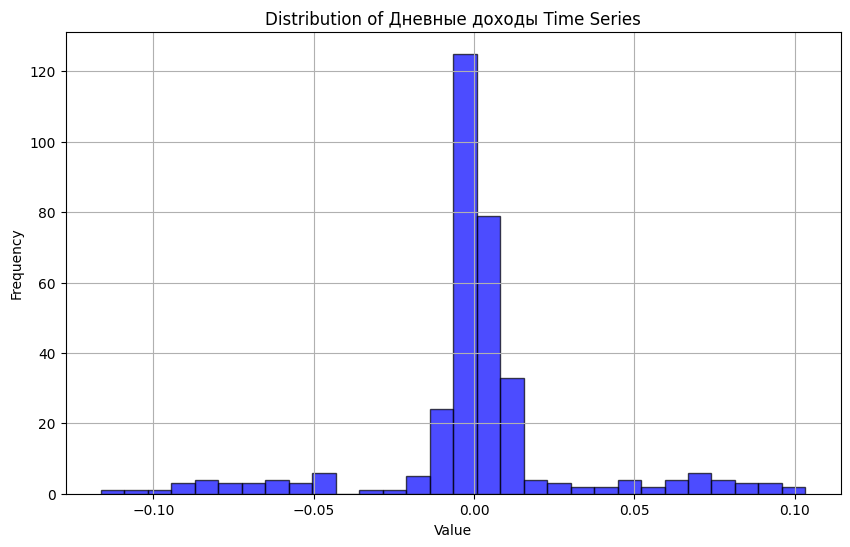

{'mean': portfolio_sum    0.001305
 dtype: float64,
 'std_dev': portfolio_sum    0.031258
 dtype: float64,
 'median': portfolio_sum    0.0
 dtype: float64,
 'q1': portfolio_sum   -0.002694
 Name: 0.25, dtype: float64,
 'q3': portfolio_sum    0.006171
 Name: 0.75, dtype: float64,
 'min': portfolio_sum   -0.11633
 dtype: float64,
 'max': portfolio_sum    0.103328
 dtype: float64}

In [ ]:
analyze_time_series(daily_revenues, 'Дневные доходы')

In [ ]:
from scipy.stats import shapiro, kstest, norm

def check_normality(data):
    """
    Check the normality of a dataset using multiple tests.

    Parameters:
    data (pd.Series or np.array): The dataset to check for normality.

    Returns:
    dict: A dictionary with test results.
    """
    # Ensure the input is a pandas Series
    if isinstance(data, np.ndarray):
        data = pd.Series(data)
    
    results = {}

    # Shapiro-Wilk Test
    shapiro_stat, shapiro_p = shapiro(data)
    results['Shapiro-Wilk'] = {'Statistic': shapiro_stat, 'p-value': shapiro_p}

    # Kolmogorov-Smirnov Test
    ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    results['Kolmogorov-Smirnov'] = {'Statistic': ks_stat, 'p-value': ks_p}

    return results

In [ ]:
# Example usage:
# Assuming you have a list or array of data
normality_results = check_normality(daily_revenues)
for test, result in normality_results.items():
    print(f"{test} Test:")
    for key, value in result.items():
        print(f"  {key}: {value}")


Shapiro-Wilk Test:
  Statistic: 0.7820014953613281
  p-value: 7.27873783386272e-21
Kolmogorov-Smirnov Test:
  Statistic: 0.999916165481405
  p-value: 0.0


После проверки наших доходностей на нормальность, мы видим что на промежутке всего 2023 года, доходность нашего портфеля распределена нормально, что доказывается тестами. То есть, мы вполне себе можем расчитывать VaR параметрическим методом.

In [ ]:
def calculate_parametric_var_99(volatility, days):
    return -2.33*volatility*np.sqrt(days)/100

In [ ]:
def calculate_expected_shortfall_975(returns, days):
    confidence_level=0.975

    # Ensure the input is a pandas Series
    if isinstance(returns, np.ndarray):
        returns = pd.Series(returns)
    
    # Calculate daily returns if days > 1
    if days > 1:
        returns = returns.rolling(window=days).sum().dropna()
    
    # Calculate the Value at Risk (VaR) at the given confidence level
    var = returns.quantile(1 - confidence_level)
    
    # Calculate the Expected Shortfall (ES)
    es = returns[returns <= var].mean()
    
    return es


In [ ]:
var_1d = calculate_parametric_var_99(portfolio_volatility, 1)
var_10d = calculate_parametric_var_99(portfolio_volatility, 10)
print("VaR(99%) на 1 день: ", var_1d)
print("VaR(99%) на 10 дней: ", var_10d)

VaR(99%) на 1 день:  portfolio_sum   -0.072832
dtype: float64
VaR(99%) на 10 дней:  portfolio_sum   -0.230314
dtype: float64


In [ ]:
es_1d = calculate_expected_shortfall_975(daily_revenues, 1)
es_10d = calculate_expected_shortfall_975(daily_revenues, 10)
print("ES(97.5%) на 1 день: ", es_1d)
print("VaR(97.5%) на 10 дней: ", es_10d)

ES(97.5%) на 1 день:  portfolio_sum   -0.093494
dtype: float64
VaR(97.5%) на 10 дней:  portfolio_sum   -0.110731
dtype: float64


# Пункт 6. Валидация оценки Value-at-Risk (Backtesting)

In [ ]:
portfolio_sum, daily_revenues = calculate_daily_revenue(df, portfolio_weights, '2022-12-01', '2023-12-31')
daily_revenues = pd.DataFrame(daily_revenues).fillna(0)

In [ ]:
# Расчет скользящей волатильности за 252 дня (1 год)
rolling_volatility = daily_revenues.rolling(window=30).std() * 100

# Расчет VaR на каждый день
var_99 = rolling_volatility.apply(lambda x: calculate_parametric_var_99(x, 1))

In [ ]:
var_99.describe()

portfolio_sum
count     367.000000
mean       -0.065707
std         0.029080
min        -0.139331
25%        -0.077146
50%        -0.060560
75%        -0.048999
max        -0.015019

In [ ]:
# Подсчет количества пробоев
breaches = (daily_revenues < var_99).sum()

In [ ]:
from scipy.stats import binomtest

# Проверка гипотезы о корректности оценки VaR
expected_prob = 0.01
observed_prob = breaches / len(daily_revenues)
observed_breaches = int(observed_prob * len(daily_revenues))
p_value = binomtest(observed_breaches, len(daily_revenues), expected_prob).pvalue

In [ ]:
# Подпортфели (акции, облигации, валюта)
equity_columns = ['SBER', 'PIKK', 'ROSN', 'BELU', 'MGNT', 'NLMK', 'KROT', 'CHMF', 'NVTK', 'PHOR']
bond_columns = ['CLOSE_SU26218RMFS6', 'CLOSE_SU26219RMFS4', 'CLOSE_SU26222RMFS8', 'CLOSE_SU26227RMFS7', 'CLOSE_SU26229RMFS3']
currency_columns = ['USD', 'EUR']

def calculate_subportfolio_var(df, columns, start_date, end_date, weights):
    subportfolio_sum, sub_daily_revenues = calculate_daily_revenue(df, weights, start_date, end_date)
    sub_volatility = sub_daily_revenues.rolling(window=30).std() * 100
    sub_var_99 = sub_volatility.apply(lambda x: calculate_parametric_var_99(x, 1))
    sub_breaches = (sub_daily_revenues < sub_var_99).sum()
    sub_observed_prob = sub_breaches / len(sub_daily_revenues)
    sub_observed_breaches = int(sub_observed_prob * len(sub_daily_revenues))
    sub_p_value = binomtest(sub_observed_breaches, len(sub_daily_revenues), expected_prob).pvalue
    return sub_observed_prob, sub_p_value

equity_weights = {col: portfolio_weights[col] for col in equity_columns}
bond_weights = {col: portfolio_weights[col] for col in bond_columns}
currency_weights = {col: portfolio_weights[col] for col in currency_columns}

equity_prob, equity_p_value = calculate_subportfolio_var(df, equity_columns, '2022-12-01', '2023-12-31', equity_weights)
bond_prob, bond_p_value = calculate_subportfolio_var(df, bond_columns, '2022-12-01', '2023-12-31', bond_weights)
currency_prob, currency_p_value = calculate_subportfolio_var(df, currency_columns, '2022-12-01', '2023-12-31', currency_weights)

print(f'Probability of breaching VaR: {observed_prob}')
print(f'p-value: {p_value}')

Probability of breaching VaR: portfolio_sum    0.025253
dtype: float64
p-value: 0.007301223214839602


In [ ]:
probs = [observed_prob.values[0], equity_prob, bond_prob, currency_prob]
print(f'Probability of breaching equity: {equity_prob}')
print(f'Probability of breaching bond: {bond_prob}')
print(f'Probability of breaching currency: {currency_prob}')

Probability of breaching equity: 0.017676767676767676
Probability of breaching bond: 0.03282828282828283
Probability of breaching currency: 0.027777777777777776


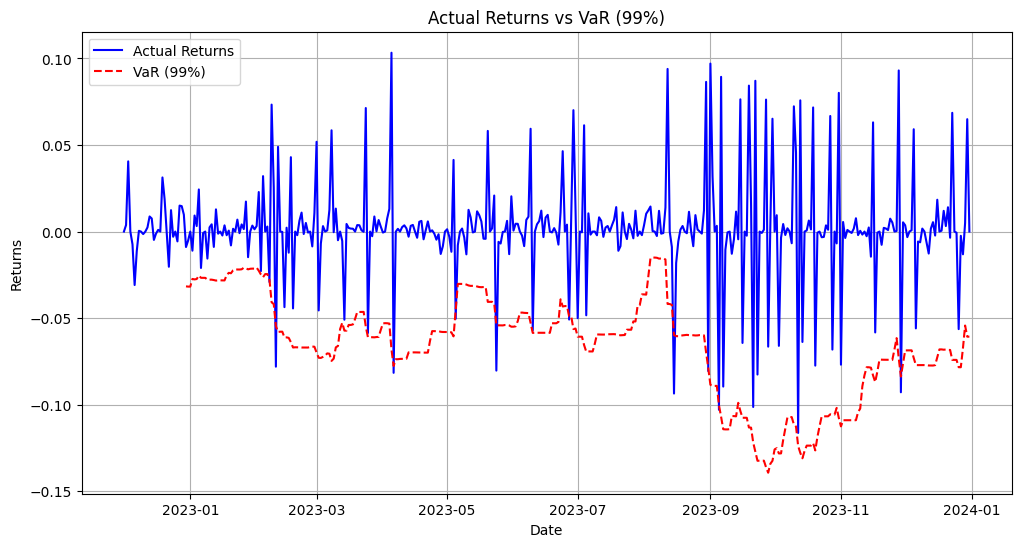

In [ ]:
# График 1: Actual Returns vs VaR (99%)
plt.figure(figsize=(12, 6))
plt.plot(daily_revenues.index, daily_revenues, label='Actual Returns', color='blue')
plt.plot(var_99.index, var_99, label='VaR (99%)', color='red', linestyle='--')
plt.title('Actual Returns vs VaR (99%)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

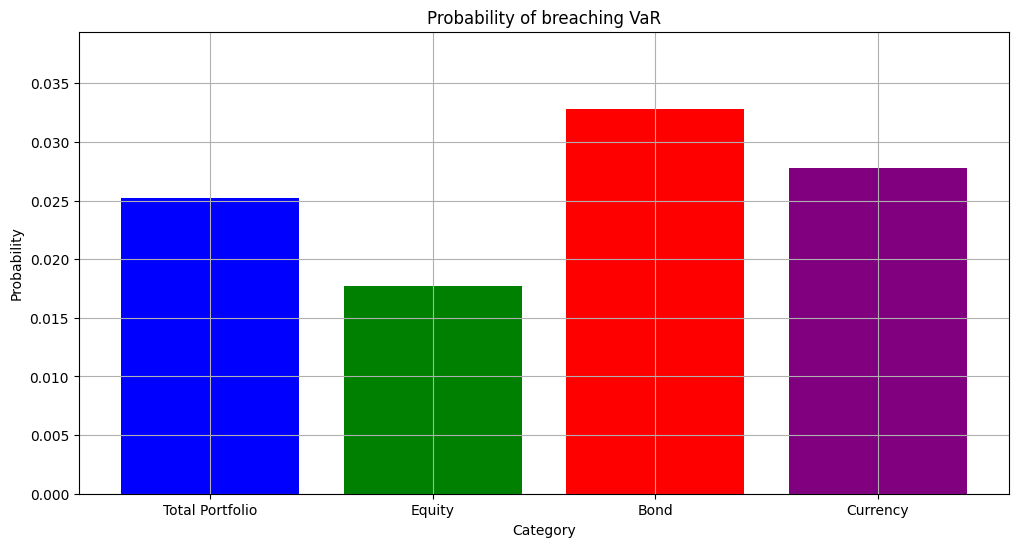

In [ ]:
# График 2: Probability of breaching VaR
plt.figure(figsize=(12, 6))
categories = ['Total Portfolio', 'Equity', 'Bond', 'Currency']
plt.bar(categories, probs, color=['blue', 'green', 'red', 'purple'])
plt.title('Probability of breaching VaR')
plt.xlabel('Category')
plt.ylabel('Probability')
plt.ylim(0, max(probs) * 1.2)
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bd1953a7-564f-4095-a5e1-3a8f080fa7e2' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>